# Exploratory Data Analysis - Bloom's Taxonomy Questions

This notebook analyzes the educational questions dataset for Bloom's Taxonomy classification.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sys
sys.path.append('../src')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

In [3]:
# Load dataset
df = pd.read_csv('../data/raw/bloom_questions.csv')
print(f"Dataset shape: {df.shape}")
df.head(10)

Dataset shape: (120, 2)


,question,level
0,What is the capital of France?,Remember
1,Define photosynthesis.,Remember
2,List the primary colors.,Remember
3,Name the first president of the United States.,Remember
4,What year did World War II end?,Remember
5,Identify the chemical symbol for water.,Remember
6,What is the formula for calculating area of a ...,Remember
7,Name three types of rocks.,Remember
8,What is the largest planet in our solar system?,Remember
9,Define the term 'ecosystem'.,Remember


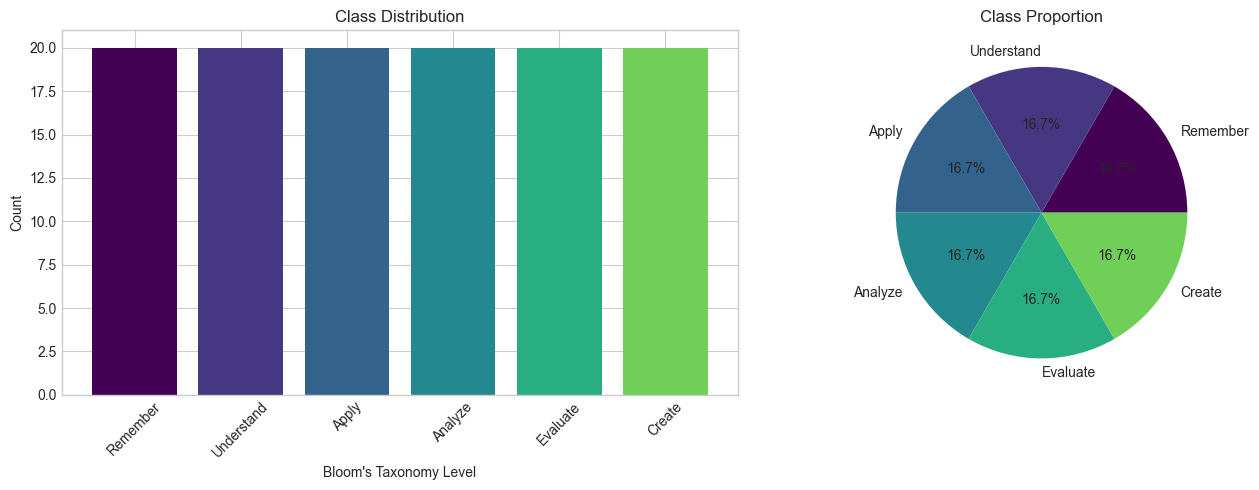

In [4]:
# Class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
level_order = ['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']
level_counts = df['level'].value_counts().reindex(level_order)
colors = plt.cm.viridis(range(0, 256, 40))
axes[0].bar(level_counts.index, level_counts.values, color=colors)
axes[0].set_xlabel('Bloom\'s Taxonomy Level')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Class Proportion')

plt.tight_layout()
plt.show()

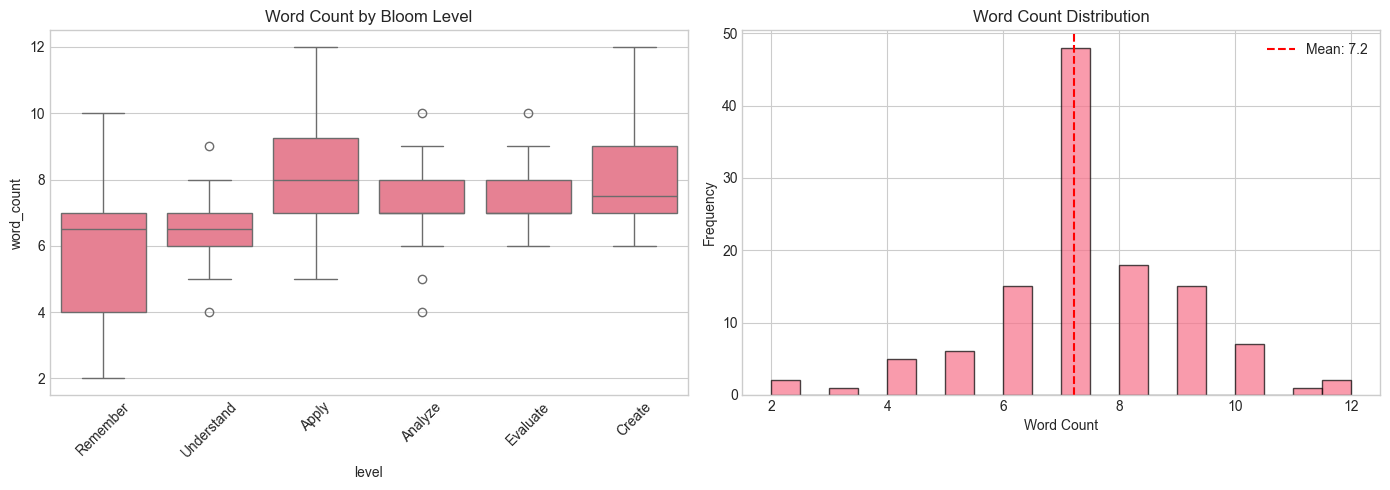

In [5]:
# Question length analysis
df['word_count'] = df['question'].apply(lambda x: len(x.split()))
df['char_count'] = df['question'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Word count distribution by level
sns.boxplot(data=df, x='level', y='word_count', order=level_order, ax=axes[0])
axes[0].set_title('Word Count by Bloom Level')
axes[0].tick_params(axis='x', rotation=45)

# Overall word count histogram
axes[1].hist(df['word_count'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Word Count Distribution')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

In [6]:
# Sample questions from each level
print("Sample Questions by Bloom's Level:")
print("=" * 60)
for level in level_order:
    print(f"\n{level.upper()}:")
    samples = df[df['level'] == level]['question'].sample(3).tolist()
    for i, q in enumerate(samples, 1):
        print(f"  {i}. {q}")

Sample Questions by Bloom's Level:

REMEMBER:
  1. Define the word 'democracy'.
  2. Name three types of rocks.
  3. What organ pumps blood through the body?

UNDERSTAND:
  1. Interpret the data shown in this graph.
  2. Explain why exercise is important for health.
  3. Describe the process of evaporation.

APPLY:
  1. Use the formula to convert 100 degrees Fahrenheit to Celsius.
  2. Use the Pythagorean theorem to find the missing side.
  3. Solve this word problem using multiplication.

ANALYZE:
  1. Analyze the causes of climate change.
  2. Examine the impact of social media on communication.
  3. Analyze the author's use of literary devices.

EVALUATE:
  1. Assess the reliability of this news source.
  2. Assess the quality of evidence in this research paper.
  3. Determine the best approach to solve this engineering problem.

CREATE:
  1. Create a model to predict weather patterns.
  2. Create a new recipe combining different cuisines.
  3. Design a building that maximizes energ

In [7]:
# Common keywords analysis
from preprocessing import TextPreprocessor

preprocessor = TextPreprocessor()
df['clean_text'] = df['question'].apply(preprocessor.clean_text)

# Find common words per level
print("\nMost Common Words by Level:")
print("=" * 60)
for level in level_order:
    texts = df[df['level'] == level]['clean_text'].str.split().sum()
    common = Counter(texts).most_common(10)
    words = ', '.join([w for w, c in common])
    print(f"{level:12}: {words}")


Most Common Words by Level:
Remember    : the, what, of, is, define, name, capital, list, state, for
Understand  : the, explain, describe, of, how, summarize, interpret, and, in, through
Apply       : to, the, use, of, apply, calculate, demonstrate, this, formula, how
Analyze     : the, of, analyze, compare, examine, and, different, this, in, cause
Evaluate    : the, of, this, evaluate, assess, judge, critique, effectiveness, to, whether
Create      : to, an, design, develop, new, create, the, for, of, original


In [8]:
# Statistics summary
print("\nDataset Statistics:")
print("=" * 40)
print(f"Total samples: {len(df)}")
print(f"Number of classes: {df['level'].nunique()}")
print(f"Average word count: {df['word_count'].mean():.1f}")
print(f"Min word count: {df['word_count'].min()}")
print(f"Max word count: {df['word_count'].max()}")


Dataset Statistics:
Total samples: 120
Number of classes: 6
Average word count: 7.2
Min word count: 2
Max word count: 12
